<a href="https://colab.research.google.com/github/abdulxs/Pattern-Recognition/blob/main/PR2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

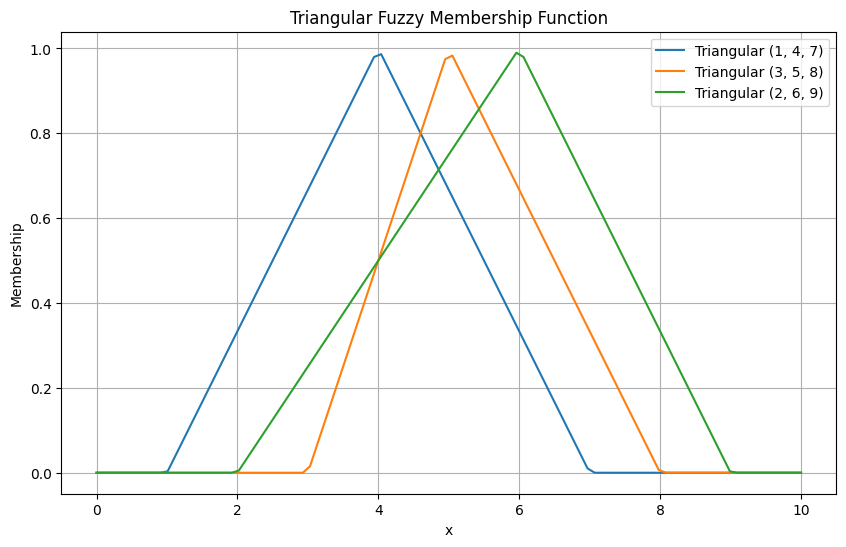

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def triangular(x, a, b, c):
    """
    Triangular fuzzy membership function.

    Parameters:
      x (float or numpy array): Input value(s).
      a (float): Left point of the triangle.
      b (float): Peak point of the triangle.
      c (float): Right point of the triangle.

    Returns:
      float or numpy array: Degree of membership between 0 and 1.
    """
    # Convert x to a numpy array to ensure element-wise operations
    x = np.array(x)

    # Initialize an array to store the results
    result = np.zeros_like(x, dtype=float)

    # Apply the triangular membership function to each element of x
    result[(x >= a) & (x < b)] = (x[(x >= a) & (x < b)] - a) / (b - a)
    result[(x >= b) & (x <= c)] = (c - x[(x >= b) & (x <= c)]) / (c - b)

    return result

# Example usage:
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)
# Triangular function with three parameter sets
plt.figure(figsize=(10, 6))
plt.plot(x, triangular(x, 1, 4, 7), label="Triangular (1, 4, 7)")
plt.plot(x, triangular(x, 3, 5, 8), label="Triangular (3, 5, 8)")
plt.plot(x, triangular(x, 2, 6, 9), label="Triangular (2, 6, 9)")
plt.xlabel('x')
plt.ylabel('Membership')
plt.title('Triangular Fuzzy Membership Function')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
def trapezoidal(x, a, b, c, d):
    """
    Trapezoidal fuzzy membership function.

    Parameters:
      x (float or numpy array): Input value(s).
      a (float): Left point of the trapezoid.
      b (float): Start of the incline.
      c (float): End of the incline.
      d (float): Right point of the trapezoid.

    Returns:
      float or numpy array: Degree of membership between 0 and 1.
    """
    x = np.array(x)
    result = np.zeros_like(x, dtype=float)

    result[(x >= a) & (x < b)] = 1.0
    result[(x >= b) & (x <= c)] = (x[(x >= b) & (x <= c)] - b) / (c - b)
    result[(x > c) & (x <= d)] = (d - x[(x > c) & (x <= d)]) / (d - c)

    return result

def gaussian(x, mean, sigma):
    """
    Gaussian fuzzy membership function.

    Parameters:
      x (float or numpy array): Input value(s).
      mean (float): Mean of the Gaussian distribution.
      sigma (float): Standard deviation of the Gaussian distribution.

    Returns:
      float or numpy array: Degree of membership between 0 and 1.
    """
    x = np.array(x)
    result = np.exp(-0.5 * ((x - mean) / sigma) ** 2)
    return result

def sigmoid(x, a, b):
    """
    Sigmoid fuzzy membership function.

    Parameters:
      x (float or numpy array): Input value(s).
      a (float): Slope of the sigmoid.
      b (float): Midpoint of the sigmoid.

    Returns:
      float or numpy array: Degree of membership between 0 and 1.
    """
    x = np.array(x)
    result = 1 / (1 + np.exp(-a * (x - b)))
    return result


2,3,4


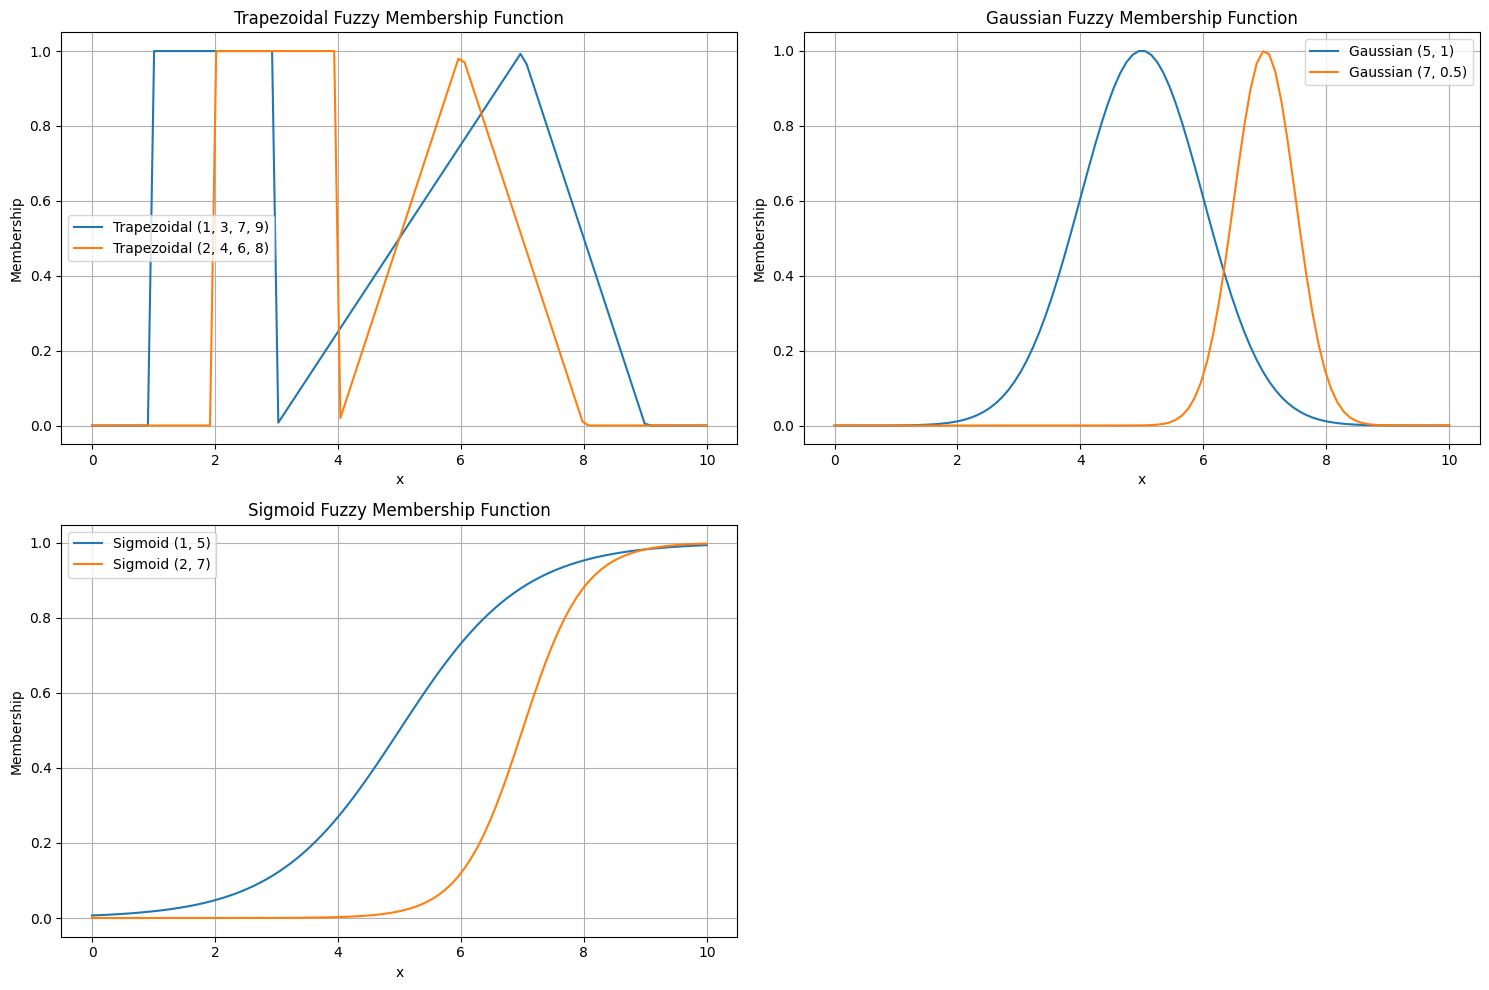

In [ ]:
x = np.linspace(0, 10, 100)

# Plotting the functions
plt.figure(figsize=(15, 10))

# Trapezoidal functions
plt.subplot(2, 2, 1)
plt.plot(x, trapezoidal(x, 1, 3, 7, 9), label="Trapezoidal (1, 3, 7, 9)")
plt.plot(x, trapezoidal(x, 2, 4, 6, 8), label="Trapezoidal (2, 4, 6, 8)")
plt.xlabel('x')
plt.ylabel('Membership')
plt.title('Trapezoidal Fuzzy Membership Function')
plt.legend()
plt.grid(True)

# Gaussian functions
plt.subplot(2, 2, 2)
plt.plot(x, gaussian(x, 5, 1), label="Gaussian (5, 1)")
plt.plot(x, gaussian(x, 7, 0.5), label="Gaussian (7, 0.5)")
plt.xlabel('x')
plt.ylabel('Membership')
plt.title('Gaussian Fuzzy Membership Function')
plt.legend()
plt.grid(True)

# Sigmoid functions
plt.subplot(2, 2, 3)
plt.plot(x, sigmoid(x, 1, 5), label="Sigmoid (1, 5)")
plt.plot(x, sigmoid(x, 2, 7), label="Sigmoid (2, 7)")
plt.xlabel('x')
plt.ylabel('Membership')
plt.title('Sigmoid Fuzzy Membership Function')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Task 2


In [ ]:

def trapezoid(x, a, b, c, d):
    """
    Trapezoidal membership function.

    Args:
        x: Input value or array of input values.
        a: Left endpoint.
        b: Lower threshold.
        c: Upper threshold.
        d: Right endpoint.

    Returns:
        Degree of membership between 0 and 1.
    """
    mu = np.zeros_like(x)
    mu[(x >= a) & (x < b)] = (x[(x >= a) & (x < b)] - a) / (b - a)
    mu[(x >= b) & (x <= c)] = 1
    mu[(x > c) & (x <= d)] = (d - x[(x > c) & (x <= d)]) / (d - c)
    return mu

def centroid_defuzzification(x, mu):
    """
    Centroid defuzzification method.

    Args:
        x: Input values.
        mu: Membership degrees for the input values.

    Returns:
        Defuzzified value (center of gravity).
    """
    return np.sum(x * mu) / np.sum(mu)

def som_defuzzification(x, mu):
    """
    Smallest of maximum (SOM) defuzzification method.

    Args:
        x: Input values.
        mu: Membership degrees for the input values.

    Returns:
        Defuzzified value (input value with the highest membership degree).
    """
    return x[np.argmax(mu)]

def lom_defuzzification(x, mu):
    """
    Largest of maximum (LOM) defuzzification method.

    Args:
        x: Input values.
        mu: Membership degrees for the input values.

    Returns:
        Defuzzified value (input value with the highest membership degree, excluding neighbors with the same membership).
    """
    max_index = np.argmax(mu)
    if max_index > 0 and mu[max_index] == mu[max_index - 1]:
        return np.nan  # Exclude if there's a neighbor with the same membership degree on the left
    elif max_index < len(mu) - 1 and mu[max_index] == mu[max_index + 1]:
        return np.nan  # Exclude if there's a neighbor with the same membership degree on the right
    else:
        return x[max_index]

# Example usage
x = np.linspace(0, 10, 100)  # Define a range of input values
a, b, c, d = 2, 3, 7, 8  # Parameters for the trapezoidal membership function
mu = trapezoid(x, a, b, c, d)  # Membership degrees for the fuzzy set A

# Defuzzification using centroid method
centroid_value = centroid_defuzzification(x, mu)
print("Centroid defuzzification:", centroid_value)

# Defuzzification using SOM method
som_value = som_defuzzification(x, mu)
print("SOM defuzzification:", som_value)

# Defuzzification using LOM method
lom_value = lom_defuzzification(x, mu)
print("LOM defuzzification:", lom_value)


Centroid defuzzification: 5.0
SOM defuzzification: 3.0303030303030303
LOM defuzzification: nan


task 3

In [ ]:
# Define the membership functions for inputs and outputs
def trapezoid(x, a, b, c, d):
    if x <= a or x >= d:
        return 0
    elif a < x <= b:
        return (x - a) / (b - a)
    elif b < x <= c:
        return 1
    elif c < x <= d:
        return (d - x) / (d - c)

# Define the fuzzy inference rules
def fuzzy_inference(x):
    small = trapezoid(x, -20, -15, -6, -3)
    medium = trapezoid(x, -6, -3, 3, 6)
    large = trapezoid(x, 3, 6, 15, 20)
    return small, medium, large

# Define the centroid defuzzification function
def centroid_defuzzification(memberships, values):
    numerator = sum(m * v for m, v in zip(memberships, values))
    denominator = sum(m for m in memberships if m != 0)
    return numerator / denominator if denominator != 0 else 0

# Define the input values
inputs = [-8, -5, 0, 5, 8]

# Calculate defuzzified outputs for each input value
for x in inputs:
    memberships = fuzzy_inference(x)
    output_values = [-2.46, 1.46, 5]
    defuzzified_output = centroid_defuzzification(memberships, output_values)
    print(f"For input x = {x}, defuzzified output = {defuzzified_output}")


For input x = -8, defuzzified output = -2.46
For input x = -5, defuzzified output = -1.1533333333333333
For input x = 0, defuzzified output = 1.46
For input x = 5, defuzzified output = 3.82
For input x = 8, defuzzified output = 5.0
